Birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. Baggingde oy çokluğuna dayalı bir sistem vardır. her ağacın oyları eşittir. Her bir değişkeni inceler ve en iyi tahmin yapan değişkene daha çok puan veririr. 

Random Forest Karar ağaçlarının ayırmadan önce en iyi ayırıcı olan futureyi seçer ve ona göre ayrım yaparak karar ağaçları oluşturmaktadır. gözlemler bootstrap yöntemi, değişkenler ise random olarak seçilir. Karar ağacının her bir düğümünde en iyi dallara ayırıcı bilgi kazancı en yüksek olan seçilir. ağaç oluşturmada veri setinin 2/3 ü kullanılmaktadır. 1/3 ü ise ağaçların performansı ve değişken öneminin belirlenmesinde kullanılır. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996691,0.980681
mae,0.227600,0.609475
mse,0.087458,0.572031
rmse,0.295733,0.756327


In [9]:
from sklearn.model_selection import cross_validate

model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.972556
test_neg_mean_absolute_error       -0.624881
test_neg_mean_squared_error        -0.622105
test_neg_root_mean_squared_error   -0.775186
dtype: float64

In [10]:
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_test, y_test, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.719610
test_neg_mean_absolute_error       -1.443400
test_neg_mean_squared_error        -3.512646
test_neg_root_mean_squared_error   -1.687241
dtype: float64

In [11]:
rf_model.feature_importances_

array([0.6477642 , 0.34476345, 0.00747235])

In [13]:
df_feature_imp = pd.DataFrame(index= X.columns, data = rf_model.feature_importances_,
                             columns= ["Feature_İmportance"]).sort_values("Feature_İmportance")

df_feature_imp

,Feature_İmportance
newspaper,0.007472
radio,0.344763
TV,0.647764


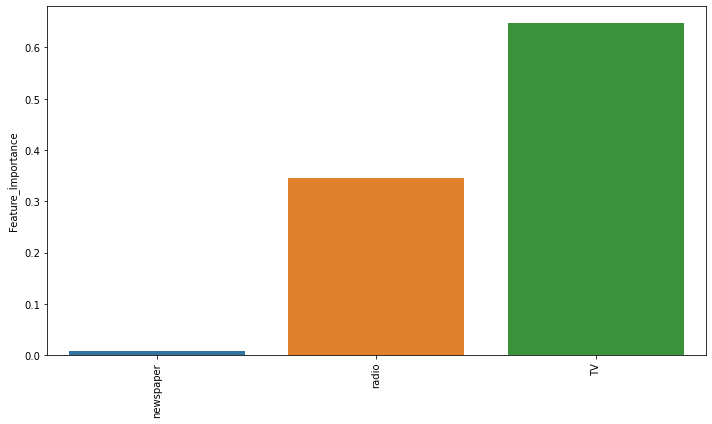

In [14]:
sns.barplot(x = df_feature_imp.index, y = "Feature_İmportance", data = df_feature_imp)
plt.xticks(rotation = 90)
plt.tight_layout()

In [15]:
X_deneme = df.drop(columns= ["newspaper", "sales"], axis=1)
y_deneme = df["sales"]

X_train_deneme, X_test_deneme, y_train_deneme, y_test_deneme = train_test_split(X_deneme, y_deneme, test_size=0.2, random_state = 101)

model = RandomForestRegressor(random_state=101)
model.fit(X_train_deneme, y_train_deneme)
train_val(model, X_train_deneme, y_train_deneme, X_test_deneme, y_test_deneme)

,train,test
R2,0.997254,0.983432
mae,0.201269,0.543175
mse,0.072570,0.490596
rmse,0.269388,0.700426


In [16]:
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train_deneme, y_train_deneme, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.976856
test_neg_mean_absolute_error       -0.553387
test_neg_mean_squared_error        -0.537438
test_neg_root_mean_squared_error   -0.717557
dtype: float64

In [17]:
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_test_deneme, y_test_deneme, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.763642
test_neg_mean_absolute_error       -1.312350
test_neg_mean_squared_error        -3.028558
test_neg_root_mean_squared_error   -1.545499
dtype: float64

In [19]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=101)

param_grid = {"n_estimators" : [None, 64, 128, 500], # ağaç sayısı
              "max_features" : ["auto", "log2", 3, 5, 10, 15], # ağaçta ki maksimun future sayısı
              "max_depth": [None, 2, 3, 4, 5,6, 7, 8, 9] # dallanma sayısı
              
             }

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train_deneme, y_train_deneme)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'log2', 3, 5, 10, 15],
                         'n_estimators': [None, 64, 128, 500]},
             scoring='neg_mean_squared_error')

In [21]:
grid_model.best_params_

{'max_depth': 9, 'max_features': 'auto', 'n_estimators': 500}

In [20]:
train_val(grid_model, X_train_deneme, y_train_deneme, X_test_deneme, y_test_deneme)

,train,test
R2,0.997509,0.984736
mae,0.193467,0.523117
mse,0.065815,0.451981
rmse,0.256545,0.672295
